In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn.apionly as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

In [2]:
from model_generator import *

### Generate df

In [3]:
paths_dict_band = json.load(open('paths_dict_band.json', 'r'))

In [4]:
band = generate_df(paths_dict_band, 'band')

In [5]:
df = band.return_completed_df()

In [6]:
name_list_24 = ['band']

In [7]:
feature_eng_df = band.return_df_feature_engineering(name_list_24)

### Train model

In [8]:
lgbm_model = train_model(df=feature_eng_df, output='band',
                        features_to_remove=['hour', 'weekday', 'season'],
                        n_folds=5)

In [9]:
from lightgbm import LGBMRegressor
pipeline = LGBMRegressor(num_leaves=60, learning_rate=0.09, n_estimators=1000, seed=0)

In [10]:
lgbm_model.obtain_cv_score(pipeline)

Mean absolute error: 3.1811 +- 0.1428
Mean squared error: 24.7813 +- 6.6859


In [11]:
lgbm_model.obtain_train_test_error(pipeline)

Train MAE: 0.567624145189, Train MSE: 1.15850607246
Test MAE: 3.0246009, Test MSE: 24.9462979926


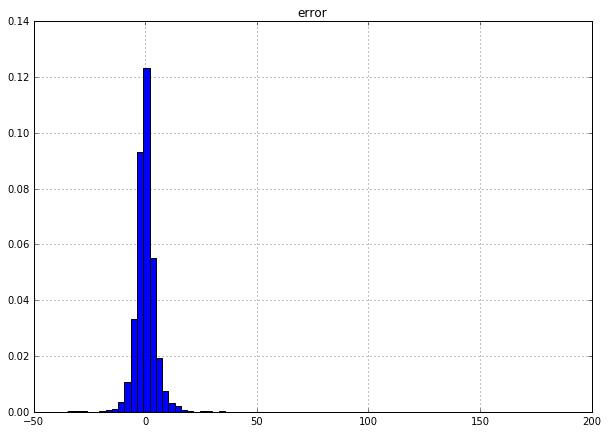

In [12]:
lgbm_model.plot_histogram_error()

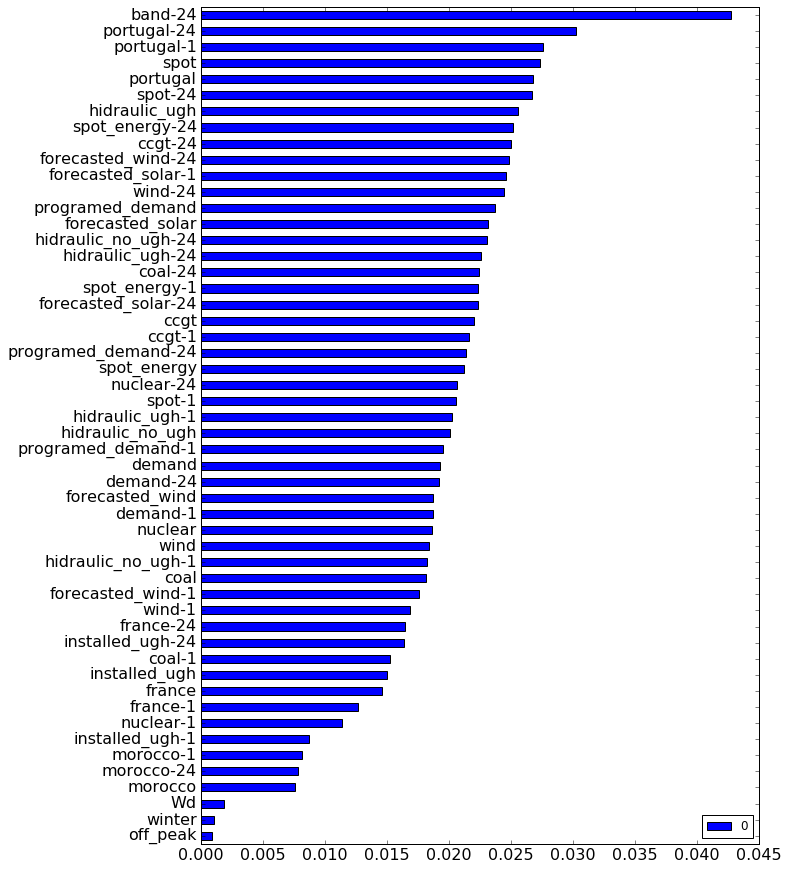

In [13]:
lgbm_model.plot_feature_importance()